## Задача научиться приобретать вино качеством от 7 и более (7, 8 и т.д.)
используя один из алгоритмов: sklearn.naive_bayes, LogisticRegression, KNeighborsClassifier

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler,Normalizer, StandardScaler,RobustScaler
from sklearn.model_selection import ShuffleSplit, StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV, KFold,RandomizedSearchCV
from sklearn.metrics import classification_report, balanced_accuracy_score,plot_roc_curve
from sklearn.metrics import recall_score, precision_score, f1_score, confusion_matrix
from sklearn.model_selection import validation_curve
# убрать предупреждения
import warnings
warnings.filterwarnings("ignore")

In [2]:
%matplotlib inline

In [5]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3673 entries, 0 to 3672
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3673 non-null   float64
 1   volatile acidity      3673 non-null   float64
 2   citric acid           3673 non-null   float64
 3   residual sugar        3673 non-null   float64
 4   chlorides             3673 non-null   float64
 5   free sulfur dioxide   3673 non-null   float64
 6   total sulfur dioxide  3673 non-null   float64
 7   density               3673 non-null   float64
 8   pH                    3673 non-null   float64
 9   sulphates             3673 non-null   float64
 10  alcohol               3673 non-null   float64
 11  quality               3673 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 344.5 KB


In [4]:
path_train = 'wine_train.csv'
dftrain = pd.read_csv(path_train)

In [6]:
a = np.where(dftrain['quality'] > 6, 1, 0)
dftrain.quality = a

In [7]:
display(dftrain)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,6.2,0.28,0.22,7.30,0.041,26.0,157.0,0.99570,3.44,0.64,9.8,1
1,5.9,0.54,0.00,0.80,0.032,12.0,82.0,0.99286,3.25,0.36,8.8,0
2,6.2,0.24,0.27,16.80,0.040,48.0,129.0,0.99691,3.23,0.38,10.5,0
3,6.7,0.42,0.46,9.70,0.054,67.0,234.0,0.99848,3.23,0.50,9.0,0
4,7.0,0.20,0.34,2.10,0.049,12.0,136.0,0.99220,3.25,0.46,11.6,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3668,8.9,0.24,0.33,15.75,0.035,16.0,132.0,0.99600,3.00,0.37,12.1,0
3669,6.7,0.24,0.26,12.60,0.053,44.0,182.0,0.99802,3.42,0.42,9.7,0
3670,7.4,0.20,0.33,1.90,0.035,39.0,138.0,0.99100,3.17,0.44,11.7,1
3671,8.0,0.16,0.36,1.50,0.033,14.0,122.0,0.99410,3.20,0.39,10.3,0


In [8]:
X_train, X_test, y_train, y_test = train_test_split(dftrain.drop('quality',axis = 1), dftrain.quality)

## KNeighborsClassifier

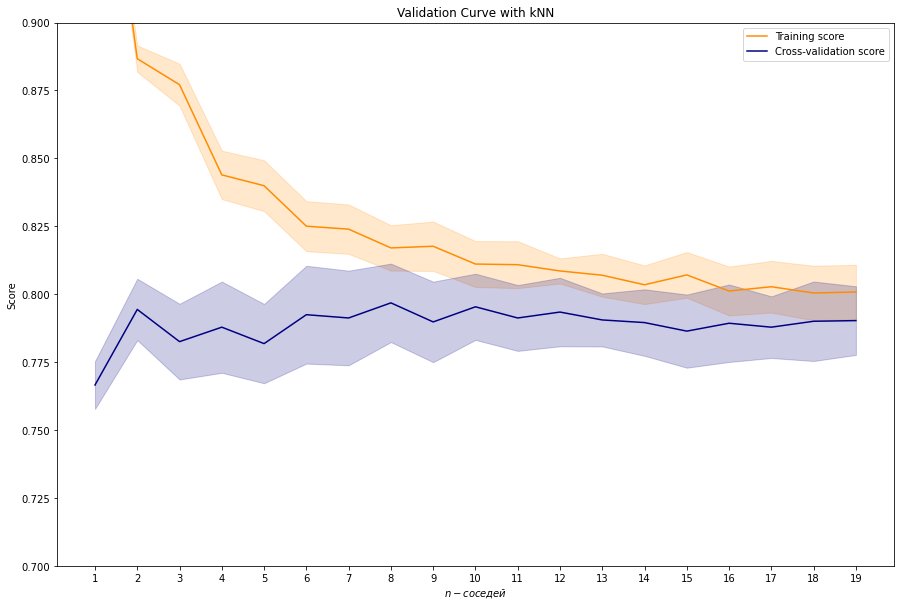

In [7]:
n_range = np.arange(1,20)

train_scores, test_scores = validation_curve(
    KNeighborsClassifier(), X_train, y_train,
    param_name="n_neighbors", 
    param_range=n_range,
    cv = ShuffleSplit(test_size = .3, train_size = .6, n_splits = 5, random_state = 42), 
    scoring="accuracy", 
    n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(15,10))

plt.title("Validation Curve with kNN")
plt.xlabel("$n-соседей$")
plt.ylabel("Score")
plt.ylim(0.70,0.90)

plt.plot(n_range, train_scores_mean, label="Training score", color="darkorange")
plt.fill_between(n_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange")
plt.plot(n_range, test_scores_mean, label="Cross-validation score",
             color="navy")
plt.fill_between(n_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy")

plt.legend(loc="best")
plt.xticks(n_range)
plt.show()

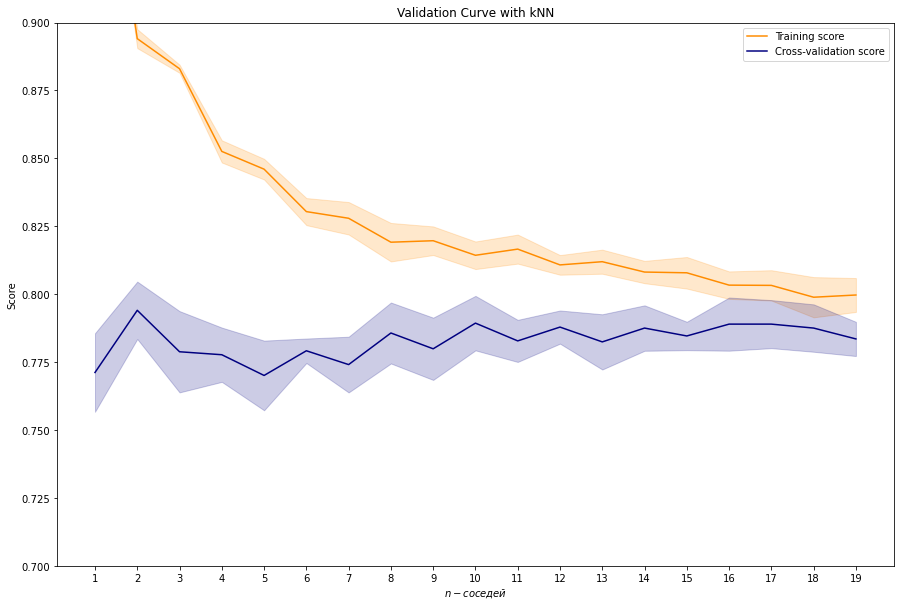

In [8]:
n_range = np.arange(1,20)

train_scores, test_scores = validation_curve(
    KNeighborsClassifier(), X_train, y_train,
    param_name="n_neighbors", 
    param_range=n_range,
    cv = KFold(), 
    scoring="accuracy", 
    n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(15,10))

plt.title("Validation Curve with kNN")
plt.xlabel("$n-соседей$")
plt.ylabel("Score")
plt.ylim(0.70,0.90)

plt.plot(n_range, train_scores_mean, label="Training score", color="darkorange")
plt.fill_between(n_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange")
plt.plot(n_range, test_scores_mean, label="Cross-validation score",
             color="navy")
plt.fill_between(n_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy")

plt.legend(loc="best")
plt.xticks(n_range)
plt.show()

In [10]:
## RANDOMSEARCH
pipeknn = Pipeline([('preprocessing', StandardScaler()),
                    ('clf', KNeighborsClassifier())])

cv = ShuffleSplit(test_size = .3, train_size = .6, n_splits = 5, random_state = 42)
p = np.arange(1,6) 
n_neighbors = np.arange(1,15)
weights = ['uniform','distance']
scaling = [ MinMaxScaler(), StandardScaler(),RobustScaler(), Normalizer()]

param_grid = [ 
    {'preprocessing':scaling,
     'clf': [KNeighborsClassifier()],
     'clf__p':p,
     'clf__n_neighbors': n_neighbors,
     'clf__weights': weights}]
gridknnrand = RandomizedSearchCV(pipeknn, param_grid, cv = cv, return_train_score=True, n_jobs=-1, scoring='precision')
gridknnrand.fit(X_train,y_train)
gridknnrand.best_params_ , gridknnrand.best_estimator_, gridknnrand.best_score_

({'preprocessing': RobustScaler(),
  'clf__weights': 'uniform',
  'clf__p': 3,
  'clf__n_neighbors': 2,
  'clf': KNeighborsClassifier(n_neighbors=2, p=3)},
 Pipeline(steps=[('preprocessing', RobustScaler()),
                 ('clf', KNeighborsClassifier(n_neighbors=2, p=3))]),
 0.6713508691571506)

In [11]:
gridknnrand.fit(X_train,y_train)
ypred_randknn= gridknnrand.predict(X_test)
print(classification_report(y_test, ypred_randknn))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91       719
           1       0.70      0.58      0.64       200

    accuracy                           0.86       919
   macro avg       0.80      0.76      0.77       919
weighted avg       0.85      0.86      0.85       919



In [12]:
print('recall:    ', recall_score(y_test,  ypred_randknn))
print('precision: ', precision_score(y_test,  ypred_randknn))
print('f1:        ', f1_score(y_test,  ypred_randknn))

recall:     0.585
precision:  0.7048192771084337
f1:         0.639344262295082


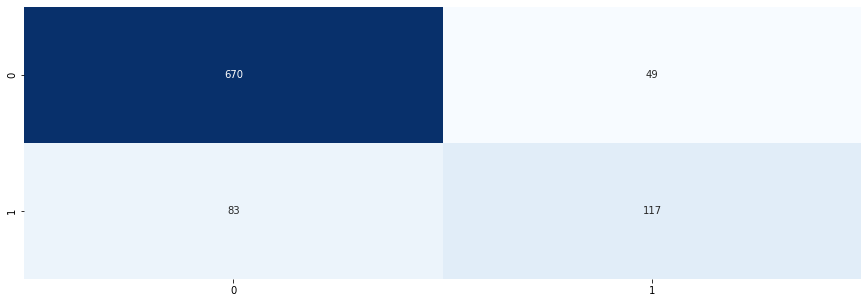

In [13]:
matrix_1=confusion_matrix(y_test,ypred_randknn)


fig,ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15,5))
ax = plt.subplot(1, 1, 1)
sns.heatmap(matrix_1,annot=True, fmt='g', cbar=None,cmap="Blues");

In [194]:
grid_result = pd.DataFrame(gridknnrand.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

,9,0,3,1,7,8,2,6,5,4
mean_fit_time,0.0064,0.005668,0.006126,0.007403,0.008402,0.005999,0.009,0.003872,0.005401,0.0
std_fit_time,0.001199,0.001177,0.005131,0.00102,0.001496,0.000634,0.0021,0.00235,0.000491,0.0
mean_score_time,0.034008,0.328764,0.282564,0.321184,0.058612,0.052213,0.035208,0.009769,0.007274,0.091158
std_score_time,0.003634,0.038479,0.030142,0.014215,0.006976,0.004917,0.001469,0.0053,0.002498,0.002484
param_preprocessing,StandardScaler(),MinMaxScaler(),MinMaxScaler(),StandardScaler(),RobustScaler(),MinMaxScaler(),RobustScaler(),Normalizer(),Normalizer(),Normalizer()
param_clf__weights,distance,distance,distance,distance,uniform,uniform,uniform,distance,distance,uniform
param_clf__p,2,3,5,4,1,2,2,1,2,4
param_clf__n_neighbors,8,9,8,5,4,8,1,6,6,8
param_clf,"KNeighborsClassifier(n_neighbors=8, weights='d...","KNeighborsClassifier(n_neighbors=8, weights='d...","KNeighborsClassifier(n_neighbors=8, weights='d...","KNeighborsClassifier(n_neighbors=8, weights='d...","KNeighborsClassifier(n_neighbors=8, weights='d...","KNeighborsClassifier(n_neighbors=8, weights='d...","KNeighborsClassifier(n_neighbors=8, weights='d...","KNeighborsClassifier(n_neighbors=8, weights='d...","KNeighborsClassifier(n_neighbors=8, weights='d...","KNeighborsClassifier(n_neighbors=8, weights='d..."
params,"{'preprocessing': StandardScaler(), 'clf__weig...","{'preprocessing': MinMaxScaler(), 'clf__weight...","{'preprocessing': MinMaxScaler(), 'clf__weight...","{'preprocessing': StandardScaler(), 'clf__weig...","{'preprocessing': RobustScaler(), 'clf__weight...","{'preprocessing': MinMaxScaler(), 'clf__weight...","{'preprocessing': RobustScaler(), 'clf__weight...","{'preprocessing': Normalizer(), 'clf__weights'...","{'preprocessing': Normalizer(), 'clf__weights'...","{'preprocessing': Normalizer(), 'clf__weights'..."


In [171]:
pipen1 = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=11, p=2, weights='distance'))
pipen1.fit(X_train,y_train)
y_pred = pipen1.predict(X_test)
print(pipen1.score(X_train,y_train))
print(pipen1.score(X_test,y_test))
print(classification_report(y_test, y_pred))

1.0
0.8454842219804135
              precision    recall  f1-score   support

           0       0.87      0.94      0.90       703
           1       0.73      0.54      0.62       216

    accuracy                           0.85       919
   macro avg       0.80      0.74      0.76       919
weighted avg       0.84      0.85      0.84       919



In [15]:
##GRIDSEARCH
pipeknngrid = Pipeline([('preprocessing', StandardScaler()),
                        ('clf', KNeighborsClassifier())
                       ])

cv = KFold()
p = np.arange(1,5) 
n_neighbors = np.arange(1,16)
weights = ['uniform', 'distance']
scaling = [ MinMaxScaler(), StandardScaler(),RobustScaler(), Normalizer()]

param_grid = [ 
    {'preprocessing':scaling,
     'clf': [KNeighborsClassifier()],
     'clf__p': p,
     'clf__n_neighbors': n_neighbors,
     'clf__weights': weights}]
gridknngrid = GridSearchCV(pipeknn, param_grid=param_grid, cv= cv, return_train_score=True, n_jobs=-1, scoring='precision')
gridknngrid.fit(X_train,y_train)
gridknngrid.best_params_ , gridknngrid.best_score_

({'clf': KNeighborsClassifier(n_neighbors=14, p=4, weights='distance'),
  'clf__n_neighbors': 14,
  'clf__p': 4,
  'clf__weights': 'distance',
  'preprocessing': RobustScaler()},
 0.7126146138424443)

In [17]:
ypred_gridknn= gridknngrid.predict(X_test)
print(classification_report(y_test, ypred_gridknn))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       719
           1       0.73      0.52      0.61       200

    accuracy                           0.85       919
   macro avg       0.80      0.73      0.76       919
weighted avg       0.85      0.85      0.84       919



In [18]:
print('recall:    ', recall_score(y_test,  ypred_gridknn))
print('precision: ', precision_score(y_test,  ypred_gridknn))
print('f1:        ', f1_score(y_test,  ypred_gridknn))

recall:     0.52
precision:  0.7323943661971831
f1:         0.608187134502924


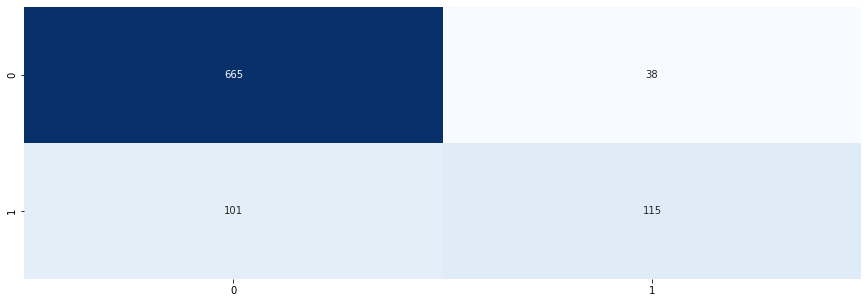

In [158]:
matrix_1=confusion_matrix(y_test,ypred_gridknn)


fig,ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15,5))
ax = plt.subplot(1, 1, 1)
sns.heatmap(matrix_1,annot=True, fmt='g', cbar=None,cmap="Blues");

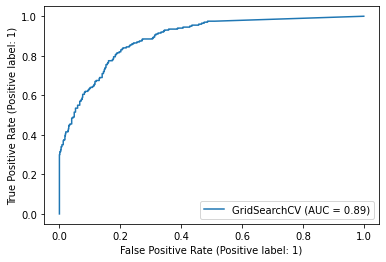

In [19]:
plot_roc_curve(gridknngrid, X_test,y_test)

In [51]:
print('Лучшие гиперпараметры данной модели: \n{}\n'.format(gridknngrid.best_params_))
print('Score с лучшими гиперпараметрами данной модели: {}'.format(gridknngrid.best_score_))

Лучшие гиперпараметры данной модели: 
{'clf': KNeighborsClassifier(n_neighbors=1), 'clf__n_neighbors': 1, 'clf__p': 2, 'clf__weights': 'uniform', 'preprocessing': StandardScaler()}

Score с лучшими гиперпараметрами данной модели: 0.5740817973375648


In [112]:
grid_result = pd.DataFrame(gridknngrid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result


,2,1,4,6,0,5,20,21,16,18,...,59,115,63,75,119,79,95,91,107,111
mean_fit_time,0.014202,0.0086,0.008802,0.011202,0.006596,0.008001,0.0042,0.007001,0.010051,0.013652,...,0.003126,0.0,0.012502,0.006251,0.003125,0.009375,0.009376,0.0125,0.007401,0.007651
std_fit_time,0.007416,0.000489,0.002136,0.001601,0.00163,0.000633,0.003487,0.007323,0.005732,0.002081,...,0.006251,0.0,0.006251,0.007655,0.00625,0.007655,0.007656,0.00625,0.00049,0.006996
mean_score_time,0.043411,0.040809,0.042008,0.034208,0.034605,0.03841,0.044936,0.051596,0.041282,0.051559,...,0.028127,0.034378,0.01875,0.025001,0.028127,0.025002,0.025001,0.021875,0.026807,0.031603
std_score_time,0.008407,0.001834,0.011315,0.003188,0.001855,0.00393,0.010928,0.006958,0.008503,0.005962,...,0.006251,0.006252,0.006248,0.007655,0.006249,0.007655,0.007655,0.007653,0.002786,0.000702
param_clf,"KNeighborsClassifier(n_neighbors=1, p=1)","KNeighborsClassifier(n_neighbors=1, p=1)","KNeighborsClassifier(n_neighbors=1, p=1)","KNeighborsClassifier(n_neighbors=1, p=1)","KNeighborsClassifier(n_neighbors=1, p=1)","KNeighborsClassifier(n_neighbors=1, p=1)","KNeighborsClassifier(n_neighbors=1, p=1)","KNeighborsClassifier(n_neighbors=1, p=1)","KNeighborsClassifier(n_neighbors=1, p=1)","KNeighborsClassifier(n_neighbors=1, p=1)",...,"KNeighborsClassifier(n_neighbors=1, p=1)","KNeighborsClassifier(n_neighbors=1, p=1)","KNeighborsClassifier(n_neighbors=1, p=1)","KNeighborsClassifier(n_neighbors=1, p=1)","KNeighborsClassifier(n_neighbors=1, p=1)","KNeighborsClassifier(n_neighbors=1, p=1)","KNeighborsClassifier(n_neighbors=1, p=1)","KNeighborsClassifier(n_neighbors=1, p=1)","KNeighborsClassifier(n_neighbors=1, p=1)","KNeighborsClassifier(n_neighbors=1, p=1)"
param_clf__n_neighbors,1,1,1,1,1,1,3,3,3,3,...,8,15,8,10,15,10,12,12,14,14
param_clf__p,1,1,2,2,1,2,2,2,1,1,...,1,1,2,1,2,2,2,1,1,2
param_clf__weights,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,...,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform
param_preprocessing,RobustScaler(),StandardScaler(),MinMaxScaler(),RobustScaler(),MinMaxScaler(),StandardScaler(),MinMaxScaler(),StandardScaler(),MinMaxScaler(),RobustScaler(),...,Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer()
params,"{'clf': KNeighborsClassifier(n_neighbors=1, p=...","{'clf': KNeighborsClassifier(n_neighbors=1, p=...","{'clf': KNeighborsClassifier(n_neighbors=1, p=...","{'clf': KNeighborsClassifier(n_neighbors=1, p=...","{'clf': KNeighborsClassifier(n_neighbors=1, p=...","{'clf': KNeighborsClassifier(n_neighbors=1, p=...","{'clf': KNeighborsClassifier(n_neighbors=1, p=...","{'clf': KNeighborsClassifier(n_neighbors=1, p=...","{'clf': KNeighborsClassifier(n_neighbors=1, p=...","{'clf': KNeighborsClassifier(n_neighbors=1, p=...",...,"{'clf': KNeighborsClassifier(n_neighbors=1, p=...","{'clf': KNeighborsClassifier(n_neighbors=1, p=...","{'clf': KNeighborsClassifier(n_neighbors=1, p=...","{'clf': KNeighborsClassifier(n_neighbors=1, p=...","{'clf': KNeighborsClassifier(n_neighbors=1, p=...","{'clf': KNeighborsClassifier(n_neighbors=1, p=...","{'clf': KNeighborsClassifier(n_neighbors=1, p=...","{'clf': KNeighborsClassifier(n_neighbors=1, p=...","{'clf': KNeighborsClassifier(n_neighbors=1, p=...","{'clf': KNeighborsClassifier(n_neighbors=1, p=..."


In [113]:
scores=[]
scorestest=[]
for n in range(1,25):
    pipe = Pipeline([('preprocessing', RobustScaler()),
                        ('clf', KNeighborsClassifier(n_neighbors=n, p=1, weights = 'uniform'))
                       ])
    pipe.fit(X_train, y_train)
    scores.append(pipe.score(X_train,y_train))
    scorestest.append(pipe.score(X_test,y_test))

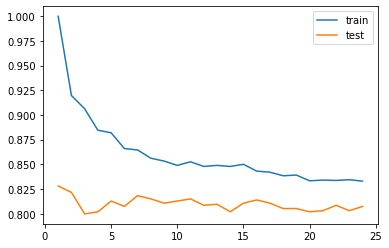

In [114]:
plt.plot(range(1,25), scores, label='train')
plt.plot(range(1,25), scorestest, label='test')
plt.legend()
plt.show()

## LogisticRegression

In [20]:
pipelr = Pipeline([('preprocessing', MinMaxScaler()),
                    ('clf', LogisticRegression()),
                    ])
scaling = [ MinMaxScaler(), StandardScaler(),RobustScaler(), Normalizer()]
cv = KFold()
param_grid =[
    {'preprocessing': scaling,
     'clf__penalty': ['l2'], 
     'clf__solver': ['newton-cg' ,'lbfgs', 'liblinear', 'sag', 'saga']},
    {'preprocessing': scaling,
     'clf__penalty': ['l1'], 
     'clf__solver': ['liblinear']},
    {'preprocessing': scaling,
     'clf__penalty': ['none'], 
     'clf__solver': ['lbfgs','newton-cg']}
    ]

gridlr = GridSearchCV(pipelr, param_grid, cv=cv, return_train_score=True, n_jobs=-1, scoring='precision')
gridlr.fit(X_train, y_train)
gridlr.best_params_ , gridlr.best_score_

({'clf__penalty': 'l2',
  'clf__solver': 'newton-cg',
  'preprocessing': MinMaxScaler()},
 0.643615813483496)

In [99]:
print('Лучшие гиперпараметры данной модели: \n{}\n'.format(gridlr.best_params_))
print('Score с лучшими гиперпараметрами данной модели: {}'.format(gridlr.best_score_))

Лучшие гиперпараметры данной модели: 
{'clf__penalty': 'l1', 'clf__solver': 'liblinear', 'preprocessing': StandardScaler()}

Score с лучшими гиперпараметрами данной модели: 0.24705551305890863


In [21]:
gridlr.fit(X_train,y_train)
ypred_lr= gridlr.predict(X_test)
print(classification_report(y_test, ypred_lr))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88       719
           1       0.60      0.17      0.27       200

    accuracy                           0.80       919
   macro avg       0.71      0.57      0.58       919
weighted avg       0.76      0.80      0.75       919



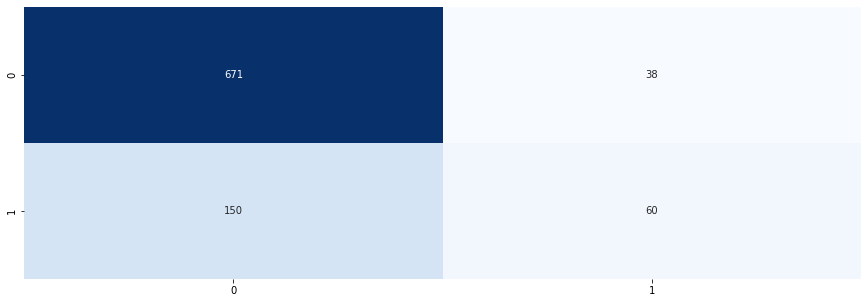

In [102]:
matrix_1=confusion_matrix(y_test,ypred_lr)


fig,ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15,5))
ax = plt.subplot(1, 1, 1)
sns.heatmap(matrix_1,annot=True, fmt='g', cbar=None,cmap="Blues");

In [96]:
grid_result = pd.DataFrame(gridlr.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

,0,4,12,16,20,17,18,1,5,9,...,28,29,30,27,3,7,11,15,19,23
mean_fit_time,0.020332,0.022004,0.0156,0.011852,0.035994,0.05867,0.06784,0.024406,0.017206,0.009802,...,0.040629,0.031256,0.028129,0.059381,0.024407,0.025006,0.007797,0.016911,0.01431,0.034378
std_fit_time,0.003892,0.004099,0.004632,0.006003,0.006265,0.007688,0.008572,0.002059,0.003311,0.000747,...,0.012501,0.009883,0.006249,0.011694,0.000798,0.001787,0.001169,0.007884,0.010235,0.015311
mean_score_time,0.002398,0.001997,0.0018,0.003534,0.0,0.003125,0.0,0.002601,0.005199,0.002598,...,0.003124,0.003125,0.006249,0.006251,0.002197,0.002401,0.002601,0.0004,0.003125,0.0
std_score_time,0.000492,0.000635,0.0004,0.006118,0.0,0.006251,0.0,0.000488,0.005417,0.000488,...,0.006249,0.006249,0.007653,0.007655,0.000399,0.000492,0.000491,0.000799,0.006249,0.0
param_clf__penalty,l2,l2,l2,l2,l1,l2,l2,l2,l2,l2,...,none,none,none,none,l2,l2,l2,l2,l2,l1
param_clf__solver,newton-cg,lbfgs,sag,saga,liblinear,saga,saga,newton-cg,lbfgs,liblinear,...,newton-cg,newton-cg,newton-cg,lbfgs,newton-cg,lbfgs,liblinear,sag,saga,liblinear
param_preprocessing,MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),StandardScaler(),RobustScaler(),StandardScaler(),StandardScaler(),StandardScaler(),...,MinMaxScaler(),StandardScaler(),RobustScaler(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer()
params,"{'clf__penalty': 'l2', 'clf__solver': 'newton-...","{'clf__penalty': 'l2', 'clf__solver': 'lbfgs',...","{'clf__penalty': 'l2', 'clf__solver': 'sag', '...","{'clf__penalty': 'l2', 'clf__solver': 'saga', ...","{'clf__penalty': 'l1', 'clf__solver': 'libline...","{'clf__penalty': 'l2', 'clf__solver': 'saga', ...","{'clf__penalty': 'l2', 'clf__solver': 'saga', ...","{'clf__penalty': 'l2', 'clf__solver': 'newton-...","{'clf__penalty': 'l2', 'clf__solver': 'lbfgs',...","{'clf__penalty': 'l2', 'clf__solver': 'libline...",...,"{'clf__penalty': 'none', 'clf__solver': 'newto...","{'clf__penalty': 'none', 'clf__solver': 'newto...","{'clf__penalty': 'none', 'clf__solver': 'newto...","{'clf__penalty': 'none', 'clf__solver': 'lbfgs...","{'clf__penalty': 'l2', 'clf__solver': 'newton-...","{'clf__penalty': 'l2', 'clf__solver': 'lbfgs',...","{'clf__penalty': 'l2', 'clf__solver': 'libline...","{'clf__penalty': 'l2', 'clf__solver': 'sag', '...","{'clf__penalty': 'l2', 'clf__solver': 'saga', ...","{'clf__penalty': 'l1', 'clf__solver': 'libline..."
split0_test_score,0.805808,0.805808,0.805808,0.805808,0.802178,0.805808,0.805808,0.805808,0.805808,0.805808,...,0.803993,0.803993,0.803993,0.802178,0.787659,0.787659,0.787659,0.787659,0.787659,0.789474
split1_test_score,0.802178,0.802178,0.802178,0.802178,0.807623,0.802178,0.803993,0.802178,0.802178,0.802178,...,0.796733,0.796733,0.796733,0.809437,0.791289,0.791289,0.791289,0.791289,0.791289,0.787659


## NaiveBayes

In [23]:
pipenb = Pipeline([('preprocessing', MinMaxScaler()), 
                   ('clf',           GaussianNB())])


cv = KFold()
scaling = [ MinMaxScaler(), StandardScaler(),RobustScaler(), Normalizer()]
clfs = [BernoulliNB(), MultinomialNB(), GaussianNB()]
param_grid =[
    {'preprocessing': scaling, 
     'clf': clfs}
    ]

gridnb = GridSearchCV(pipenb, param_grid, cv = cv, return_train_score = True,n_jobs=-1, scoring = 'precision')
gridnb.fit(X_train, y_train)
gridnb.best_params_ , gridnb.best_score_

({'clf': BernoulliNB(), 'preprocessing': MinMaxScaler()}, 0.6)

In [25]:
gridnb.score(X_test,y_test)
ypred_nb = gridnb.predict(X_test)
print(classification_report(y_test, ypred_nb))
balanced_accuracy_score(y_test, ypred_nb)

              precision    recall  f1-score   support

           0       0.78      1.00      0.88       719
           1       0.00      0.00      0.00       200

    accuracy                           0.78       919
   macro avg       0.39      0.50      0.44       919
weighted avg       0.61      0.78      0.69       919



0.4993045897079277

In [15]:
print('Лучшие гиперпараметры данной модели: \n{}\n'.format(gridnb.best_params_))
print('Score с лучшими гиперпараметрами данной модели: {}'.format(gridnb.best_score_))

Лучшие гиперпараметры данной модели: 
{'clf': BernoulliNB(), 'preprocessing': Normalizer()}

Score с лучшими гиперпараметрами данной модели: 0.78757630754001


In [93]:
grid_result = pd.DataFrame(gridnb.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

,8,9,10,1,2,11,0,3,4,7,5,6
mean_fit_time,0.007802,0.008199,0.010802,0.006798,0.008604,0.006202,0.005007,0.006402,0.006403,0.009001,0.006799,0.010003
std_fit_time,0.001169,0.000404,0.00133,0.000747,0.001357,0.000402,0.001095,0.000488,0.000491,0.003634,0.001166,0.001096
mean_score_time,0.004,0.003401,0.0036,0.002601,0.003201,0.002799,0.002997,0.0034,0.003,0.003601,0.0,0.0
std_score_time,0.000004,0.000491,0.000489,0.00049,0.000748,0.000399,0.00063,0.00049,0.00063,0.00049,0.0,0.0
param_clf,GaussianNB(),GaussianNB(),GaussianNB(),BernoulliNB(),BernoulliNB(),GaussianNB(),BernoulliNB(),BernoulliNB(),MultinomialNB(),MultinomialNB(),MultinomialNB(),MultinomialNB()
param_preprocessing,MinMaxScaler(),StandardScaler(),RobustScaler(),StandardScaler(),RobustScaler(),Normalizer(),MinMaxScaler(),Normalizer(),MinMaxScaler(),Normalizer(),StandardScaler(),RobustScaler()
params,"{'clf': GaussianNB(), 'preprocessing': MinMaxS...","{'clf': GaussianNB(), 'preprocessing': Standar...","{'clf': GaussianNB(), 'preprocessing': RobustS...","{'clf': BernoulliNB(), 'preprocessing': Standa...","{'clf': BernoulliNB(), 'preprocessing': Robust...","{'clf': GaussianNB(), 'preprocessing': Normali...","{'clf': BernoulliNB(), 'preprocessing': MinMax...","{'clf': BernoulliNB(), 'preprocessing': Normal...","{'clf': MultinomialNB(), 'preprocessing': MinM...","{'clf': MultinomialNB(), 'preprocessing': Norm...","{'clf': MultinomialNB(), 'preprocessing': Stan...","{'clf': MultinomialNB(), 'preprocessing': Robu..."
split0_test_score,0.533333,0.533333,0.533333,0.508475,0.481356,0.43342,0.0,0.0,0.0,0.0,NaN,NaN
split1_test_score,0.490323,0.490323,0.490323,0.425373,0.438849,0.462633,0.0,0.0,0.0,0.0,NaN,NaN
split2_test_score,0.52819,0.52819,0.52819,0.493333,0.472973,0.465839,0.0,0.0,0.0,0.0,NaN,NaN


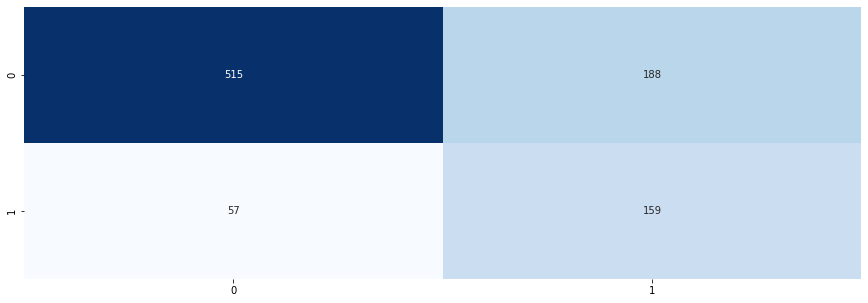

In [174]:
matrix_1=confusion_matrix(y_test,ypred_nb)


fig,ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15,5))
ax = plt.subplot(1, 1, 1)
sns.heatmap(matrix_1,annot=True, fmt='g', cbar=None,cmap="Blues");

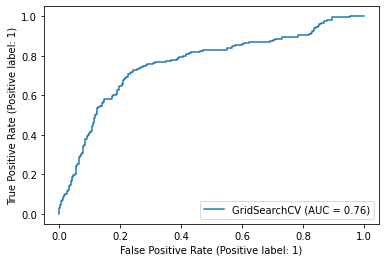

In [175]:
plot_roc_curve(gridnb, X_test,y_test)

# Итог

## Выбираем модель с наибольшим precision

In [28]:
pipefinal = make_pipeline(RobustScaler(), KNeighborsClassifier(n_neighbors=14, p=4, weights='distance'))
pipefinal.fit(X_train,y_train)
y_pred = pipefinal.predict(X_test)
print(pipefinal.score(X_train,y_train))
print(pipefinal.score(X_test,y_test))
print(classification_report(y_test, y_pred))

1.0
0.8541893362350381
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       719
           1       0.73      0.52      0.61       200

    accuracy                           0.85       919
   macro avg       0.80      0.73      0.76       919
weighted avg       0.85      0.85      0.84       919

